# Is there a correlation between relationships and mental health?

In [3]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import hypergeom
from scipy.stats import fisher_exact


# Import cleaned .csv file
file = "../main_resources/hc_workers/cleaned_hcw_df.csv"
hcw_df = pd.read_csv(file, encoding='cp1252')
hcw_df

,Timestamp,Please indicate your age,Gender,Please indicate which Indian State/Union territory you are currently residing in,Educational qualification,Marital status,Are you currently COVID-19 positive?,Do you know any family member(s) or friend(s) who has/have tested positive for COVID-19?,"During the lockdown period, indicate who you are living with:",Have you ever been diagnosed with any anxiety disorder by a health worker like a psychiatrist/psychologist/counselor before?,...,My job made me feel enthusiastic.,My job made me feel excited.,My job made me feel fatigued.,My job made me feel frightened.,My job made me feel furious.,My job made me feel gloomy.,My job made me feel inspired.,My job made me feel relaxed.,My job made me feel satisfied.,ID
0,6-7-2020 11:43:59,50-60,Male,Delhi,Post graduate,Married,No,No,Family,No,...,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,0
1,6-7-2020 23:40:05,50-60,Male,Maharashtra,Post graduate,Married,No,No,Family,No,...,4.0,4.0,2.0,1.0,1.0,1.0,4.0,3.0,5.0,1
2,6-8-2020 0:52:01,50-60,Male,Rajasthan,PhD,Married,No,Yes,Family,No,...,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,2
3,6-8-2020 1:00:52,30-40,Male,Maharashtra,Graduate,Married,No,No,Family,No,...,5.0,5.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,3
4,6-8-2020 8:36:49,50-60,Male,Maharashtra,Graduate,Married,No,No,Family,No,...,4.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,6-25-2020 14:29:18,30-40,Male,NaN,NaN,Married,No,No,Family,No,...,3.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,234
233,6-26-2020 18:51:47,50-60,Female,West Bengal,Post graduate,Married,No,No,Family,No,...,1.0,1.0,2.0,1.0,2.0,1.0,5.0,3.0,4.0,235
234,6-28-2020 0:22:21,50-60,Male,West Bengal,Post graduate,Married,No,No,Family,No,...,4.0,3.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0,236
235,6-28-2020 10:45:58,60 and above,Male,West Bengal,Post graduate,Married,No,No,Family,No,...,4.0,3.0,3.0,4.0,1.0,1.0,4.0,2.0,5.0,237


# Correlation Matrix

In [45]:
# The data without ID for my job made me feel...blank questions
corr_hcw_df = hcw_df[{
    "My job made me feel angry.",
    "My job made me feel anxious.",	
    "My job made me feel at ease.",	
    "My job made me feel bored.",	
    "My job made me feel calm.",
    "My job made me feel content.",	
    "My job made me feel depressed.",	
    "My job made me feel discouraged.",	
    "My job made me feel disgusted.",	
    "My job made me feel ecstatic.",	
    "My job made me feel energetic.",	
    "My job made me feel enthusiastic.",	
    "My job made me feel excited.",	
    "My job made me feel fatigued.",	
    "My job made me feel frightened.",
    "My job made me feel furious.",
    "My job made me feel gloomy.",
    "My job made me feel inspired.",
    "My job made me feel relaxed.",
    "My job made me feel satisfied."
}]

# The same data with ID
corr_hcw_df_id = hcw_df[{
    "My job made me feel angry.",
    "My job made me feel anxious.",	
    "My job made me feel at ease.",	
    "My job made me feel bored.",	
    "My job made me feel calm.",
    "My job made me feel content.",	
    "My job made me feel depressed.",	
    "My job made me feel discouraged.",	
    "My job made me feel disgusted.",	
    "My job made me feel ecstatic.",	
    "My job made me feel energetic.",	
    "My job made me feel enthusiastic.",	
    "My job made me feel excited.",	
    "My job made me feel fatigued.",	
    "My job made me feel frightened.",
    "My job made me feel furious.",
    "My job made me feel gloomy.",
    "My job made me feel inspired.",
    "My job made me feel relaxed.",
    "My job made me feel satisfied.",
    "ID"
}]

# Calculating the problems score

In [4]:
# Import problems .csv
file = "../main_resources/hc_workers/problems_with.csv"
problems_df = pd.read_csv(file, encoding='cp1252')

problems_df

,Friends,Landlord,None,Self,Government,Spouse,Family,ID
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...
232,0,0,0,0,0,0,0,234
233,0,0,0,0,0,0,0,235
234,0,0,0,0,0,0,0,236
235,0,0,0,0,0,0,0,237


In [6]:
# Using BT's dummy variables csv to calculate a problems score we summed each row
problems_df_id = problems_df.set_index("ID")
problems_df_id["Total"] = problems_df_id.sum(axis=1)
problems_df_id

problem_score = problems_df_id.sum(axis=1)
print(problem_score)

ID
0      2
1      2
2      2
3      0
4      0
      ..
234    0
235    0
236    0
237    0
238    2
Length: 237, dtype: int64


# Calculating the support score

In [9]:
# Import support files
file = "../main_resources/hc_workers/received_support_from.csv"
support_df = pd.read_csv(file, encoding='cp1252')

# Dropping self column as that does not count as support
support_df = support_df.drop(["Self"], axis=1)
support_df


,Friends,Landlord,Spouse,Government,Family,ID
0,1,0,1,0,1,0
1,1,0,1,0,0,1
2,1,0,1,0,0,2
3,0,0,1,0,0,3
4,1,0,1,0,1,4
...,...,...,...,...,...,...
232,0,0,1,0,1,234
233,0,0,1,0,1,235
234,1,0,1,0,1,236
235,0,0,1,0,1,237


In [10]:

support_df_id = support_df.set_index("ID")
support_df_id["Support Score"] = support_df_id.sum(axis=1)
support_df_id

support_score = support_df_id.sum(axis=1)
print(support_score)

ID
0      6
1      4
2      4
3      2
4      6
      ..
234    4
235    4
236    6
237    4
238    6
Length: 237, dtype: int64


# Taking only the questions that were focused on positive feelings


In [16]:
# Taking only the columns for positive feelings
positive_feels_og = hcw_df[[
    "At my work, I feel bursting with energy",
    "At my job, I feel strong and vigorous",
    "I am enthusiastic about my job",
    "My job inspires me",
    "When I get up in the morning, I feel like going to work",
    "I feel happy when I am working intensely",
    "I am proud of the work that I do",
    "I am immersed in my work",
    "I get carried away when I am working",
    "ID"
]]

#Set ID as the index
positive_feels_df = pd.DataFrame(positive_feels_og).set_index("ID")
positive_feels_df

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,My job inspires me,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working
ID,,,,,,,,,
0,Often,Often,Often,Often,Often,Often,Often,Often,Sometimes
1,Very often,Very often,Always,Always,Always,Always,Always,Very often,Sometimes
2,Very often,Very often,Very often,Very often,Very often,Very often,Very often,Very often,Often
3,Often,Often,Often,Often,Often,Often,Always,Often,Often
4,Very often,Very often,Very often,Very often,Very often,Very often,Always,Often,Sometimes
...,...,...,...,...,...,...,...,...,...
234,Rarely,Often,Often,Sometimes,Sometimes,Sometimes,Often,Often,Sometimes
235,Always,Always,Always,Always,Always,Always,Always,Always,Always
236,Always,Always,Always,Very often,Always,Very often,Very often,Very often,Often


In [18]:
# Cleaning values to change it into a number for positive feelings
for i in range(0,9):
    positive_feels_df.iloc[:,i] = positive_feels_df.iloc[:,i].replace({
        'Always': 3, 
        'Very often': 2, 
        'Often': 1, 
        'Sometimes': 0, 
        'Rarely': -1,
        'Almost Never': -2, 
        'Never': -3
    })

positive_feels_df

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,My job inspires me,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working
ID,,,,,,,,,
0,1,1,1,1,1,1,1,1,0
1,2,2,3,3,3,3,3,2,0
2,2,2,2,2,2,2,2,2,1
3,1,1,1,1,1,1,3,1,1
4,2,2,2,2,2,2,3,1,0
...,...,...,...,...,...,...,...,...,...
234,-1,1,1,0,0,0,1,1,0
235,3,3,3,3,3,3,3,3,3
236,3,3,3,2,3,2,2,2,1


In [23]:
# Positive Question Scoring
per_id_positive = positive_feels_df.sum(axis=1)
per_id_positive.astype(int)
per_id_positive

ID
0       8
1      21
2      17
3      11
4      16
       ..
234     3
235    27
236    21
237     0
238    21
Length: 237, dtype: int64

# Taking all the questions focused on negative feelings

In [24]:
# Grouped all the negative survey questions into one

negative_feels = hcw_df[[
    "I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",
    "I had trouble falling or staying asleep because I was thinking about the coronavirus.",
    "I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.",
    "I lost interest in eating when I thought about or was exposed to information about the coronavirus.",
    "I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.",
    "I had disturbing thoughts that I may have caught the coronavirus.",
    "I had disturbing thoughts that certain people I saw may have the coronavirus.",
    "I could not stop thinking about the coronavirus.",
    "ID"
]]
negative_feels_df = pd.DataFrame(negative_feels).set_index("ID")
negative_feels_df

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.
ID,,,,,,,,
0,Rare,Rare,Rare,Rare,Rare,Several days,Several days,Several days
1,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Rare,Several days
2,Not at all,Not at all,Not at all,Not at all,Not at all,Rare,Rare,Rare
3,Not at all,Not at all,Not at all,Not at all,Not at all,Rare,Rare,Several days
4,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
...,...,...,...,...,...,...,...,...
234,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Rare,Rare
235,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
236,Not at all,Rare,Rare,Not at all,Rare,Rare,Less than a day or two,Nearly every day over the last 2 weeks


In [25]:
# Cleaning values to change it into a number for negative feelings
for i in range(0,8):
    negative_feels_df.iloc[:,i] = negative_feels_df.iloc[:,i].replace({
        'Several days': 0, 
        'Very often': 1, 
        "More than 7 days" : 2,
        'Nearly every day over the last 2 weeks' : 3, 
        'Rare': -3,
        'Not at all': -2, 
        'Less than a day or two': -1 
    })

# negative_feels_df = negative_feels_df.reset_index()
negative_feels_df.astype(int)
negative_feels_df

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.
ID,,,,,,,,
0,-3,-3,-3,-3,-3,0,0,0
1,-2,-2,-2,-2,-2,-2,-3,0
2,-2,-2,-2,-2,-2,-3,-3,-3
3,-2,-2,-2,-2,-2,-3,-3,0
4,-2,-2,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...,...
234,-2,-2,-2,-2,-2,-2,-3,-3
235,-2,-2,-2,-2,-2,-2,-2,-2
236,-2,-3,-3,-2,-3,-3,-1,3


In [26]:
# Positive Scoring
per_id_negative = negative_feels_df.sum(axis=1)
per_id_negative

ID
0     -15
1     -15
2     -19
3     -16
4     -16
       ..
234   -18
235   -16
236   -14
237   -14
238   -15
Length: 237, dtype: int64

# Combined score to find the highest feeling score and lowest feeling score

In [27]:
# Merge the 2 columns to create an overall score
combined_score = pd.DataFrame({
    "Positive Score" : per_id_positive,
    "Negative Score" : per_id_negative 
})


feeling_score = combined_score.sum(axis=1)
# print(combined_score)
# print(feeling_score)
print("--------------------------")
print("The highest feeling score is " + str(feeling_score.max()))
print("The lowest feeling score is " + str(feeling_score.min()))
print("The average feeling score is " + str(feeling_score.mean()))

--------------------------
The highest feeling score is 29
The lowest feeling score is -50
The average feeling score is -2.4725738396624473


# Correlation Matrix for Support vs. Positive Feelings

In [28]:
# Combine overall positive and negative score into dataframe
job_rel_df = pd.merge(positive_feels_df, support_df_id, on='ID')
job_rel_df

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,My job inspires me,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working,Friends,Landlord,Spouse,Government,Family,Support Score
ID,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,3
1,2,2,3,3,3,3,3,2,0,1,0,1,0,0,2
2,2,2,2,2,2,2,2,2,1,1,0,1,0,0,2
3,1,1,1,1,1,1,3,1,1,0,0,1,0,0,1
4,2,2,2,2,2,2,3,1,0,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1,1,1,0,0,0,1,1,0,0,0,1,0,1,2
235,3,3,3,3,3,3,3,3,3,0,0,1,0,1,2
236,3,3,3,2,3,2,2,2,1,1,0,1,0,1,3


In [31]:
# Corr matrix
job_rel_matrix = job_rel_df.corr()
job_rel_matrix_colored = job_rel_matrix.style.background_gradient(cmap='coolwarm')
job_rel_matrix_colored

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,My job inspires me,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working,Friends,Landlord,Spouse,Government,Family,Support Score
"At my work, I feel bursting with energy",1.000000,0.399833,0.332366,0.178676,0.344049,0.289035,0.265125,0.271040,0.294927,0.194934,0.087747,0.098616,0.015441,0.157951,0.247527
"At my job, I feel strong and vigorous",0.399833,1.000000,0.580555,0.382003,0.442157,0.407840,0.364369,0.450765,0.309161,0.105068,0.058126,0.145474,0.050703,0.037688,0.161697
I am enthusiastic about my job,0.332366,0.580555,1.000000,0.593714,0.618144,0.490608,0.458353,0.436928,0.364739,0.028513,0.069746,0.132349,0.049001,0.183751,0.193558
My job inspires me,0.178676,0.382003,0.593714,1.000000,0.591183,0.662717,0.721489,0.454161,0.263237,0.099396,0.048249,0.068050,0.011582,0.058757,0.124795
"When I get up in the morning, I feel like going to work",0.344049,0.442157,0.618144,0.591183,1.000000,0.586203,0.619847,0.626764,0.330491,0.074640,0.038045,0.023057,0.080871,0.122158,0.129287
I feel happy when I am working intensely,0.289035,0.407840,0.490608,0.662717,0.586203,1.000000,0.703737,0.552442,0.311807,0.092476,0.043805,0.180969,-0.042163,-0.025682,0.126369
I am proud of the work that I do,0.265125,0.364369,0.458353,0.721489,0.619847,0.703737,1.000000,0.556495,0.295068,0.045991,0.001167,0.121144,-0.012131,0.086156,0.127238
I am immersed in my work,0.271040,0.450765,0.436928,0.454161,0.626764,0.552442,0.556495,1.000000,0.430246,0.153974,0.066246,0.113914,0.069521,0.181851,0.249472
I get carried away when I am working,0.294927,0.309161,0.364739,0.263237,0.330491,0.311807,0.295068,0.430246,1.000000,0.002174,0.090981,0.170191,0.045755,0.021009,0.117687
Friends,0.194934,0.105068,0.028513,0.099396,0.074640,0.092476,0.045991,0.153974,0.002174,1.000000,0.112168,0.083502,-0.001010,0.236130,0.694593


In [32]:
lowest_corr_p = job_rel_matrix['Support Score'].drop('Support Score').min()
print(lowest_corr_p)

lowest_corr_idx_p = job_rel_matrix['Support Score'].sort_values().index[0]
print("There is a low correlation between Support Score and " + lowest_corr_idx_p)

0.11768700313522047
There is a low correlation between Support Score and I get carried away when I am working


In [33]:
high_corr_p = (job_rel_matrix['Support Score'][job_rel_matrix['Support Score'] != 1]).max()
print(high_corr_p)

high_corr_idx_p = (job_rel_matrix['Support Score'][job_rel_matrix['Support Score'] != 1]).idxmax()
print("There is a positive correlation between Support Score and " + high_corr_idx_p)

0.6945933121093265
There is a positive correlation between Support Score and Friends


# Correlation Matrix for Support vs. Negative Feelings

In [34]:
job_rel_df2 = pd.merge(negative_feels_df, support_df_id, on='ID')
job_rel_df2

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.,Friends,Landlord,Spouse,Government,Family,Support Score
ID,,,,,,,,,,,,,,
0,-3,-3,-3,-3,-3,0,0,0,1,0,1,0,1,3
1,-2,-2,-2,-2,-2,-2,-3,0,1,0,1,0,0,2
2,-2,-2,-2,-2,-2,-3,-3,-3,1,0,1,0,0,2
3,-2,-2,-2,-2,-2,-3,-3,0,0,0,1,0,0,1
4,-2,-2,-2,-2,-2,-2,-2,-2,1,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-2,-2,-2,-2,-2,-2,-3,-3,0,0,1,0,1,2
235,-2,-2,-2,-2,-2,-2,-2,-2,0,0,1,0,1,2
236,-2,-3,-3,-2,-3,-3,-1,3,1,0,1,0,1,3


In [37]:
# Combine overall support score and negative score into dataframe
job_rel_df2 = job_rel_df2.drop(["Friends", "Landlord", "Spouse", "Government", "Family"], axis=1)
job_rel_matrix2 = job_rel_df2.corr()
job_rel_matrix_colored2 = job_rel_matrix2.style.background_gradient(cmap='coolwarm')
job_rel_matrix_colored2

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.,Support Score
"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",1.000000,0.567577,0.313258,0.368182,0.078624,0.216060,0.243621,0.370705,-0.059105
I had trouble falling or staying asleep because I was thinking about the coronavirus.,0.567577,1.000000,0.436798,0.548439,0.334794,0.418893,0.515173,0.394179,-0.061229
I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,0.313258,0.436798,1.000000,0.282881,0.228642,0.302604,0.219813,0.237938,-0.052705
I lost interest in eating when I thought about or was exposed to information about the coronavirus.,0.368182,0.548439,0.282881,1.000000,0.339912,0.356790,0.413974,0.350467,-0.098006
I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,0.078624,0.334794,0.228642,0.339912,1.000000,0.287705,0.262573,0.225505,-0.059238
I had disturbing thoughts that I may have caught the coronavirus.,0.216060,0.418893,0.302604,0.356790,0.287705,1.000000,0.644657,0.440715,-0.019844
I had disturbing thoughts that certain people I saw may have the coronavirus.,0.243621,0.515173,0.219813,0.413974,0.262573,0.644657,1.000000,0.508183,0.051895
I could not stop thinking about the coronavirus.,0.370705,0.394179,0.237938,0.350467,0.225505,0.440715,0.508183,1.000000,-0.011190
Support Score,-0.059105,-0.061229,-0.052705,-0.098006,-0.059238,-0.019844,0.051895,-0.011190,1.000000


In [38]:
high_corr_p2 = (job_rel_matrix2['Support Score'][job_rel_matrix2['Support Score'] != 1]).max()
print(high_corr_p2)

high_corr_idx_p2 = (job_rel_matrix2['Support Score'][job_rel_matrix2['Support Score'] != 1]).idxmax()
print("There is a highest correlation between Support Score and " + high_corr_idx_p2)

0.051894932097654466
There is a highest correlation between Support Score and I had disturbing thoughts that certain people I saw may have the coronavirus.


In [39]:
lowest_corr_p2 = job_rel_matrix2['Support Score'].drop('Support Score').min()
print(lowest_corr_p2)

lowest_corr_idx_p2 = job_rel_matrix2['Support Score'].sort_values().index[0]
print("There is a low correlation between Support Score and " + lowest_corr_idx_p2)

-0.09800637678472279
There is a low correlation between Support Score and I lost interest in eating when I thought about or was exposed to information about the coronavirus.


# Other Feeling Corr Matrix

In [47]:

job_corr_df = pd.merge(corr_hcw_df_id, support_df_id, on='ID')
job_corr_df = job_corr_df.drop(["ID", "Friends", "Landlord", "Spouse", "Government", "Family"], axis=1)
job_core_matrix = job_corr_df.corr()
job_core_matrix_colored = job_core_matrix.style.background_gradient(cmap='coolwarm')
job_core_matrix_colored

,My job made me feel depressed.,My job made me feel excited.,My job made me feel angry.,My job made me feel furious.,My job made me feel bored.,My job made me feel satisfied.,My job made me feel frightened.,My job made me feel relaxed.,My job made me feel content.,My job made me feel disgusted.,My job made me feel anxious.,My job made me feel discouraged.,My job made me feel at ease.,My job made me feel energetic.,My job made me feel ecstatic.,My job made me feel enthusiastic.,My job made me feel calm.,My job made me feel fatigued.,My job made me feel inspired.,My job made me feel gloomy.,Support Score
My job made me feel depressed.,1.000000,-0.143957,0.624637,0.433191,0.512637,-0.225908,0.496699,-0.230005,0.025412,0.777539,0.473159,0.846605,-0.115195,-0.196602,0.161119,-0.172040,-0.047766,0.506542,-0.192277,0.299638,-0.253394
My job made me feel excited.,-0.143957,1.000000,-0.085032,0.189280,-0.286191,0.646747,0.014815,0.474380,0.476723,-0.140286,-0.020559,-0.129650,0.454105,0.807791,0.374582,0.856629,0.330941,0.000330,0.750671,0.210570,0.069454
My job made me feel angry.,0.624637,-0.085032,1.000000,0.353921,0.447048,-0.233192,0.368465,-0.218448,0.049727,0.562626,0.539824,0.621341,0.035373,-0.116164,0.108593,-0.140966,-0.110405,0.498050,-0.180328,0.148764,-0.282349
My job made me feel furious.,0.433191,0.189280,0.353921,1.000000,0.234438,0.118470,0.673296,0.008399,0.069403,0.484962,0.346933,0.443350,0.018097,0.177326,0.099451,0.115841,-0.081229,0.502491,0.161130,0.661732,-0.270162
My job made me feel bored.,0.512637,-0.286191,0.447048,0.234438,1.000000,-0.348160,0.258782,-0.119559,-0.010595,0.487990,0.212126,0.512213,-0.053436,-0.281060,-0.028554,-0.232869,0.012384,0.422641,-0.327919,0.101804,-0.107556
My job made me feel satisfied.,-0.225908,0.646747,-0.233192,0.118470,-0.348160,1.000000,-0.024331,0.605312,0.481605,-0.223253,-0.023188,-0.226969,0.395978,0.676554,0.337819,0.693379,0.406810,-0.078327,0.764540,0.188518,0.141068
My job made me feel frightened.,0.496699,0.014815,0.368465,0.673296,0.258782,-0.024331,1.000000,-0.035705,0.047227,0.463886,0.458791,0.468846,-0.019592,0.002564,0.065442,0.010350,-0.082303,0.600601,0.044753,0.502586,-0.252865
My job made me feel relaxed.,-0.230005,0.474380,-0.218448,0.008399,-0.119559,0.605312,-0.035705,1.000000,0.370059,-0.194706,-0.200342,-0.250660,0.312559,0.528706,0.305829,0.569150,0.414069,-0.080728,0.570278,0.111092,0.195593
My job made me feel content.,0.025412,0.476723,0.049727,0.069403,-0.010595,0.481605,0.047227,0.370059,1.000000,0.008185,0.077324,-0.011565,0.466516,0.421867,0.514136,0.521686,0.611329,0.044754,0.469054,-0.055623,0.039000
My job made me feel disgusted.,0.777539,-0.140286,0.562626,0.484962,0.487990,-0.223253,0.463886,-0.194706,0.008185,1.000000,0.452803,0.857838,-0.133800,-0.191589,0.223209,-0.170626,-0.036074,0.451719,-0.187374,0.338093,-0.325773


In [48]:
lowest_corr = job_core_matrix['Support Score'].drop('Support Score').min()
print(lowest_corr)

lowest_corr_idx = job_core_matrix['Support Score'].sort_values().index[0]
print("There is a negative correlation between Support Score and " + lowest_corr_idx)

-0.32577309924531705
There is a negative correlation between Support Score and My job made me feel disgusted.


In [49]:
high_corr = (job_core_matrix['Support Score'][job_core_matrix['Support Score'] != 1]).max()
print(high_corr)

high_corr_idx = (job_core_matrix['Support Score'][job_core_matrix['Support Score'] != 1]).idxmax()
print("There is a positive correlation between Support Score and " + high_corr_idx)

0.1955934732600702
There is a positive correlation between Support Score and My job made me feel relaxed.


In [50]:
job_core_matrix_abs = job_core_matrix.abs()

least_value = job_core_matrix_abs['Support Score'].drop('Support Score').min()
least_index = job_core_matrix_abs['Support Score'].sort_values().index[0]

print(least_value)
print("There is a least amount of correlation between Support Score and " + least_index)

0.03899956286171155
There is a least amount of correlation between Support Score and My job made me feel content.


# Stacked Bar Chart

In [66]:
positive_feels_count = pd.DataFrame(positive_feels_og)
positive_feels_count

for i in range(0,9):
    positive_feels_count.iloc[:,i] = positive_feels_count.iloc[:,i].replace({
        'Often': 1, 
        'Very often': 2, 
        'Sometimes': 0, 
        'Always': 3, 
        'Never': -3,
        'Almost Never': -2, 
        'Rarely': -1 
    })

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [67]:
energy_count = positive_feels_count["At my work, I feel bursting with energy"].value_counts()

strong_count = positive_feels_count["At my job, I feel strong and vigorous"].value_counts()

enthusiastic_count = positive_feels_count["I am enthusiastic about my job"].value_counts()

morning_count = positive_feels_count["When I get up in the morning, I feel like going to work"].value_counts()

happy_count = positive_feels_count["I feel happy when I am working intensely"].value_counts()

proud_count = positive_feels_count["I am proud of the work that I do"].value_counts()

immersed_count = positive_feels_count["I am immersed in my work"].value_counts()

carriedaway_count = positive_feels_count["I get carried away when I am working"].value_counts()

positive_feels_allcounts = pd.DataFrame({
    "At my work, I feel bursting with energy" : energy_count,
    "At my job, I feel strong and vigorous" : strong_count,
    "I am enthusiastic about my job" : enthusiastic_count,
    "When I get up in the morning, I feel like going to work" : morning_count,
    "I feel happy when I am working intensely" : happy_count,
    "I am proud of the work that I do" : proud_count,
    "I am immersed in my work" : immersed_count,
    "I get carried away when I am working" : carriedaway_count
})

positive_feels_allcounts

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working
-3,47,21,21,13,5,7,12,34
-2,10,8,4,5,4,3,3,14
-1,25,10,11,11,15,4,6,24
0,66,44,27,19,23,17,31,43
1,20,35,29,28,23,26,35,36
2,28,32,27,35,33,24,44,23
3,41,87,118,126,134,156,106,63


In [68]:
positive_feels_allcounts_newindex = positive_feels_allcounts.rename(index={
        1: 'Often',
        2 : 'Very often', 
        0 : 'Sometimes',
        3 : 'Always',
        -3 : 'Never',
        -2 :'Almost Never',
        -1 : 'Rarely',
})
positive_feels_allcounts_newindex

,"At my work, I feel bursting with energy","At my job, I feel strong and vigorous",I am enthusiastic about my job,"When I get up in the morning, I feel like going to work",I feel happy when I am working intensely,I am proud of the work that I do,I am immersed in my work,I get carried away when I am working
Never,47,21,21,13,5,7,12,34
Almost Never,10,8,4,5,4,3,3,14
Rarely,25,10,11,11,15,4,6,24
Sometimes,66,44,27,19,23,17,31,43
Often,20,35,29,28,23,26,35,36
Very often,28,32,27,35,33,24,44,23
Always,41,87,118,126,134,156,106,63


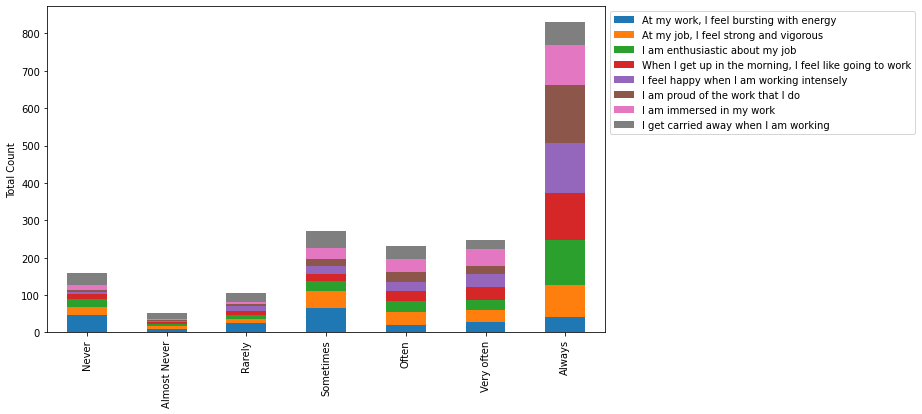

In [69]:

stacked_job = positive_feels_allcounts_newindex.plot(kind='bar', stacked=True, mark_right=True, figsize=(10, 6))

# add some labels and legend
stacked_job.set_ylabel('Total Count')
stacked_job.set_title('')
stacked_job.legend(bbox_to_anchor=(1.0, 1.0))

# show the plot
plt.show()

In [70]:
negative_feels

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.,ID
0,-3,-3,-3,-3,-3,0,0,0,0
1,-2,-2,-2,-2,-2,-2,-3,0,1
2,-2,-2,-2,-2,-2,-3,-3,-3,2
3,-2,-2,-2,-2,-2,-3,-3,0,3
4,-2,-2,-2,-2,-2,-2,-2,-2,4
...,...,...,...,...,...,...,...,...,...
232,-2,-2,-2,-2,-2,-2,-3,-3,234
233,-2,-2,-2,-2,-2,-2,-2,-2,235
234,-2,-3,-3,-2,-3,-3,-1,3,236
235,-2,-3,-2,-2,-2,0,0,-3,237


In [71]:
negative_feels_count = pd.DataFrame(negative_feels)
negative_feels_count

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.,ID
0,-3,-3,-3,-3,-3,0,0,0,0
1,-2,-2,-2,-2,-2,-2,-3,0,1
2,-2,-2,-2,-2,-2,-3,-3,-3,2
3,-2,-2,-2,-2,-2,-3,-3,0,3
4,-2,-2,-2,-2,-2,-2,-2,-2,4
...,...,...,...,...,...,...,...,...,...
232,-2,-2,-2,-2,-2,-2,-3,-3,234
233,-2,-2,-2,-2,-2,-2,-2,-2,235
234,-2,-3,-3,-2,-3,-3,-1,3,236
235,-2,-3,-2,-2,-2,0,0,-3,237


In [72]:
dizzy_count = negative_feels_count["I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus."].value_counts()

troublesleeping_count = negative_feels_count["I had trouble falling or staying asleep because I was thinking about the coronavirus."].value_counts()

frozen_count = negative_feels_count["I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus."].value_counts()

appetiteloss_count = negative_feels_count["I lost interest in eating when I thought about or was exposed to information about the coronavirus."].value_counts()

nauseous_count = negative_feels_count["I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus."].value_counts()

disturbing_count = negative_feels_count["I had disturbing thoughts that I may have caught the coronavirus."].value_counts()

disturbing2_count = negative_feels_count["I had disturbing thoughts that certain people I saw may have the coronavirus."].value_counts()

thinking_count = negative_feels_count["I could not stop thinking about the coronavirus."].value_counts()

negative_feels_allcounts = pd.DataFrame({
    "I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus." : dizzy_count,
    "I had trouble falling or staying asleep because I was thinking about the coronavirus." : troublesleeping_count,
    "I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus." : frozen_count,
    "I lost interest in eating when I thought about or was exposed to information about the coronavirus." : appetiteloss_count,
    "I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus." : nauseous_count,
    "I had disturbing thoughts that I may have caught the coronavirus." : disturbing_count,
    "I had disturbing thoughts that certain people I saw may have the coronavirus." : disturbing2_count,
    "I could not stop thinking about the coronavirus." : thinking_count
})

negative_feels_allcounts

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.
-3,39,36,45,34,19.0,56,79,71
-2,170,168,172,180,201.0,144,115,111
-1,4,9,3,6,10.0,14,13,14
0,12,16,11,11,6.0,17,23,19
2,1,2,3,3,1.0,3,3,4
3,11,6,3,3,NaN,3,4,18


In [73]:
negative_feels_allcounts_newindex = negative_feels_allcounts.rename(index={
        1: 'Often',
        2 : 'Very often', 
        0 : 'Sometimes',
        3 : 'Always',
        -3 : 'Never',
        -2 :'Almost Never',
        -1 : 'Rarely',
})
negative_feels_allcounts_newindex

,"I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.",I had trouble falling or staying asleep because I was thinking about the coronavirus.,I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.,I lost interest in eating when I thought about or was exposed to information about the coronavirus.,I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.,I had disturbing thoughts that I may have caught the coronavirus.,I had disturbing thoughts that certain people I saw may have the coronavirus.,I could not stop thinking about the coronavirus.
Never,39,36,45,34,19.0,56,79,71
Almost Never,170,168,172,180,201.0,144,115,111
Rarely,4,9,3,6,10.0,14,13,14
Sometimes,12,16,11,11,6.0,17,23,19
Very often,1,2,3,3,1.0,3,3,4
Always,11,6,3,3,NaN,3,4,18


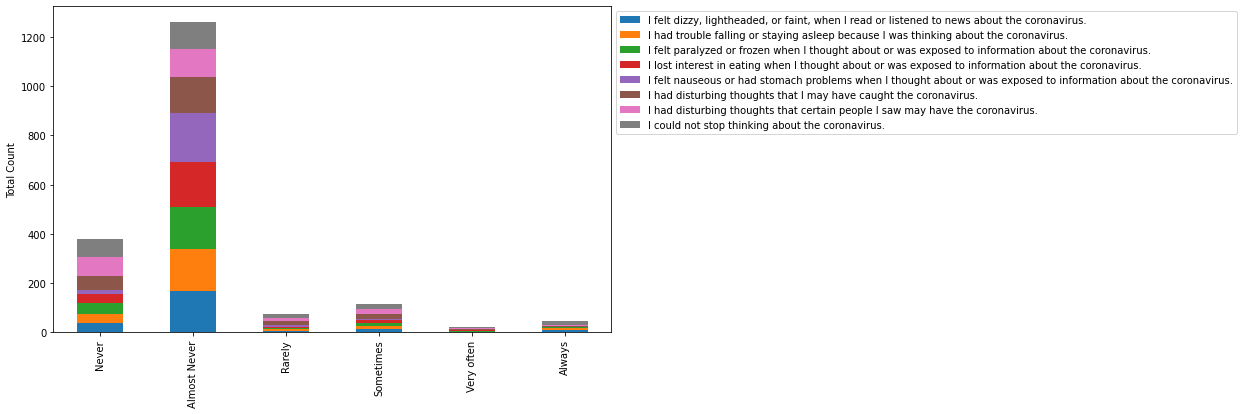

In [74]:
stacked_job2 = negative_feels_allcounts_newindex.plot(kind='bar', stacked=True, mark_right=True, figsize=(10, 6))

# add some labels and legend
stacked_job2.set_ylabel('Total Count')
stacked_job2.set_title('')
stacked_job2.legend(bbox_to_anchor=(1.0, 1.0))

# show the plot
plt.show()